___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
df = pd.read_csv("Frozen_Dessert_Production.csv", parse_dates=True, index_col="DATE")
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [4]:
df.columns

Index(['IPN31152N'], dtype='object')

In [5]:
df=df.rename(columns = {'IPN31152N':'Production'})


In [6]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [8]:
#df =df.astype(object)

In [9]:
df.head(9)

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126
1972-08-01,96.361
1972-09-01,85.801


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Production,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


In [18]:
df.columns = ["Production"]



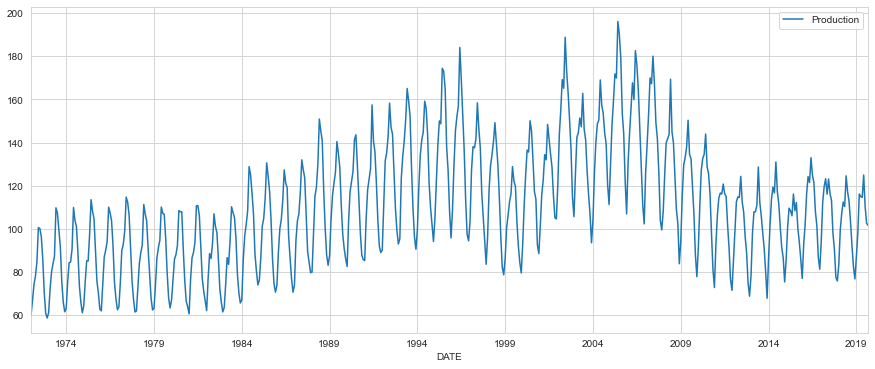

In [20]:
df.plot(figsize=(15,6));

# Preprocessing of Data

## Train Test Split

In [21]:
len(df)

573

In [22]:
test_percent = 0.15

In [23]:
len(df)*test_percent

85.95

In [24]:
test_point = np.round(len(df)*test_percent)
test_point

86.0

In [25]:
test_ind = int(len(df) - test_point)
test_ind

487

In [26]:
train = df.iloc[-test_ind:]
test = df.iloc[:-test_ind]

In [27]:
train.shape, test.shape

((487, 1), (86, 1))

In [28]:
train

,Production
DATE,
1979-03-01,86.427
1979-04-01,91.203
1979-05-01,94.701
1979-06-01,110.103
1979-07-01,107.154
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [29]:
test

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
1978-10-01,79.184
1978-11-01,67.885
1978-12-01,62.403


## Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler # OUTLIERS SIKINTI İSE ROBUST 

In [31]:
scaler = MinMaxScaler()

In [32]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [33]:
df.columns

Index(['Production'], dtype='object')

## Time Series Generator

In [34]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [42]:
#define generator
length = 12  # months
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,
                                 targets = train_scaled, 
                                length = length,
                               batch_size = batch_size,
                               stride = stride)

In [43]:
len(train_scaled)

487

In [44]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

475

In [45]:
generator

In [47]:
generator[0]

(array([[[0.19074639],
         [0.22595733],
         [0.25175185],
         [0.36532927],
         [0.34358374],
         [0.34076914],
         [0.2562912 ],
         [0.14038437],
         [0.05407329],
         [0.02009673],
         [0.04736307],
         [0.11713015]]]),
 array([[0.18677999]]))

In [48]:
# # What does the first batch look like?
X, y = generator[0]

In [49]:
print(f'Given the Array: \n{X}')    
print(f'Predict this y: \n{y}')



Given the Array: 
[[[0.19074639]
  [0.22595733]
  [0.25175185]
  [0.36532927]
  [0.34358374]
  [0.34076914]
  [0.2562912 ]
  [0.14038437]
  [0.05407329]
  [0.02009673]
  [0.04736307]
  [0.11713015]]]
Predict this y: 
[[0.18677999]]


In [50]:
train_scaled[:10]

array([[0.19074639],
       [0.22595733],
       [0.25175185],
       [0.36532927],
       [0.34358374],
       [0.34076914],
       [0.2562912 ],
       [0.14038437],
       [0.05407329],
       [0.02009673]])

<AxesSubplot:xlabel='DATE'>

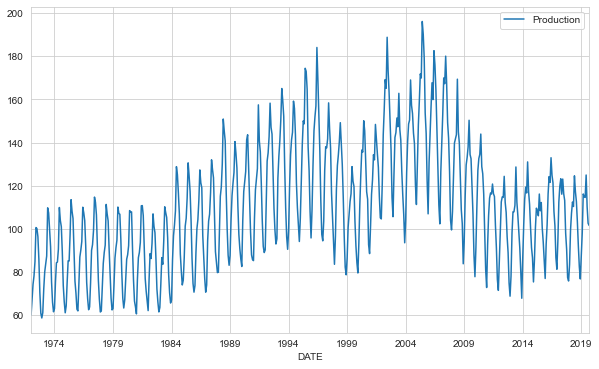

In [51]:
df.plot()

The more length the more training time

# Modelling & Model Performance

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [57]:
n_features = 1

## with "tanh" activation function

In [58]:
model_tanh = Sequential()
model_tanh.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features)))
model_tanh.add(Dense(1))
model_tanh.compile(optimizer = 'adam', loss = 'mse')

In [59]:
model_tanh.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [60]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [61]:
model_tanh.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
475/475 [==============================] - 7s 10ms/step - loss: 0.0270 - val_loss: 0.0059
Epoch 2/20
475/475 [==============================] - 4s 9ms/step - loss: 0.0065 - val_loss: 0.0010
Epoch 3/20
475/475 [==============================] - 4s 8ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 4/20
475/475 [==============================] - 4s 8ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 5/20
475/475 [==============================] - 4s 8ms/step - loss: 0.0039 - val_loss: 0.0019


<AxesSubplot:>

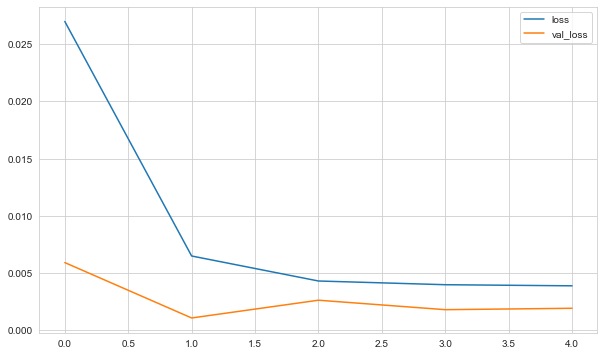

In [63]:
loss_df = pd.DataFrame(model_tanh.history.history)
loss_df.plot()

### Evaluation on Test Data

In [64]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_tanh.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 26ms/step


### Inverse Transformation and Comparing

In [65]:
true_predictions = scaler.inverse_transform(test_predictions)

In [66]:
test['Predictions_Tanh'] = true_predictions
test

,Production,Predictions_Tanh
DATE,,
1972-01-01,59.962,93.561
1972-02-01,67.061,91.831
1972-03-01,74.235,94.806
1972-04-01,78.112,100.951
1972-05-01,84.764,107.597
...,...,...
1978-10-01,79.184,148.372
1978-11-01,67.885,148.661
1978-12-01,62.403,149.049


<AxesSubplot:xlabel='DATE'>

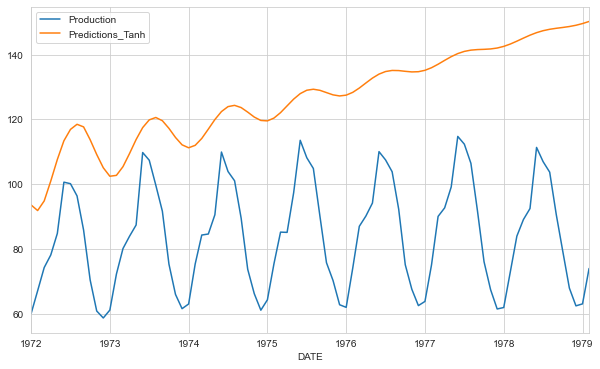

In [67]:
test.plot()

In [68]:
eval_metrics(test['Production'], test['Predictions_Tanh'])

r2_score: -7.199038701605746 
mae: 43.02557774267787 
mse: 2217.700026473207 
rmse: 47.09246252292618


## with "relu" activation function

In [69]:
model_relu = Sequential()
model_relu.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model_relu.add(Dense(1))
model_relu.compile(optimizer = 'adam', loss = 'mse')

In [70]:
model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_relu.fit_generator(generator, epochs = 30,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/30
475/475 [==============================] - 5s 8ms/step - loss: 0.0233 - val_loss: 0.0088
Epoch 2/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0099 - val_loss: 0.0070
Epoch 3/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 4/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 5/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0054 - val_loss: 0.0023
Epoch 6/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 7/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 8/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 9/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 10/30
475/475 [==============================] - 3s 7ms/step - loss: 0.0036 - val_loss: 0.0020

<AxesSubplot:>

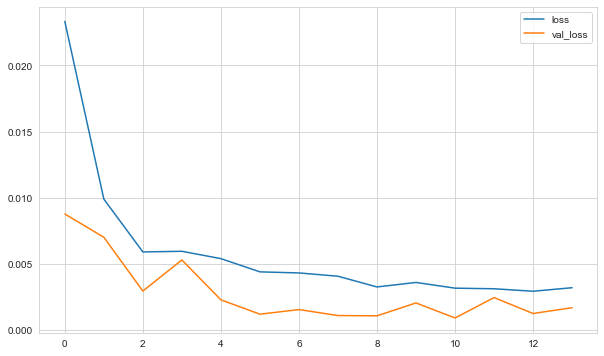

In [72]:
loss_df = pd.DataFrame(model_relu.history.history)
loss_df.plot()

### Evaluation on Test Data

In [73]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_relu.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 22ms/step


### Inverse Transformation and Comparing

In [74]:
true_predictions = scaler.inverse_transform(test_predictions)

In [75]:
test['Predictions_Relu'] = true_predictions
test

,Production,Predictions_Tanh,Predictions_Relu
DATE,,,
1972-01-01,59.962,93.561,92.363
1972-02-01,67.061,91.831,87.981
1972-03-01,74.235,94.806,89.277
1972-04-01,78.112,100.951,97.997
1972-05-01,84.764,107.597,109.233
...,...,...,...
1978-10-01,79.184,148.372,138.117
1978-11-01,67.885,148.661,125.430
1978-12-01,62.403,149.049,116.637


<AxesSubplot:xlabel='DATE'>

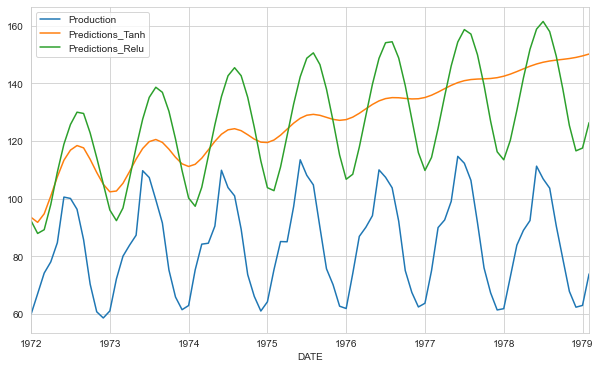

In [76]:
test.plot()

In [78]:
eval_metrics(test['Production'], test['Predictions_Relu'])

r2_score: -6.435953125022124 
mae: 42.863519221048726 
mse: 2011.2984024560658 
rmse: 44.84750163003582


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [79]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [80]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [81]:
model = Sequential()
model.add(LSTM(150, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 7s 9ms/step - loss: 0.0223
Epoch 2/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0091
Epoch 3/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0054
Epoch 4/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0052
Epoch 5/15
561/561 [==============================] - 5s 8ms/step - loss: 0.0046
Epoch 6/15
561/561 [==============================] - 5s 8ms/step - loss: 0.0042
Epoch 7/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0041
Epoch 8/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0042
Epoch 9/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0034
Epoch 10/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0038
Epoch 11/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0032
Epoch 12/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0033
Epoch 13/15
561/561 [====

In [82]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 16ms/step


In [83]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 91.19683513],
       [ 82.87117465],
       [ 79.4888197 ],
       [ 87.24278968],
       [ 98.27347083],
       [107.88814585],
       [113.53374869],
       [118.03802771],
       [118.52360352],
       [113.15715099],
       [106.22869101],
       [ 97.72665647],
       [ 87.5883316 ],
       [ 80.01327585],
       [ 77.99705956],
       [ 85.6714764 ],
       [ 95.80657808],
       [104.77413393],
       [111.7028162 ],
       [116.09631051],
       [116.5833898 ],
       [112.80122211],
       [105.57203363],
       [ 95.8230517 ]])

In [84]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [85]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [86]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,91.197
2019-11-01,82.871
2019-12-01,79.489
2020-01-01,87.243
2020-02-01,98.273
2020-03-01,107.888
2020-04-01,113.534
2020-05-01,118.038
2020-06-01,118.524
2020-07-01,113.157


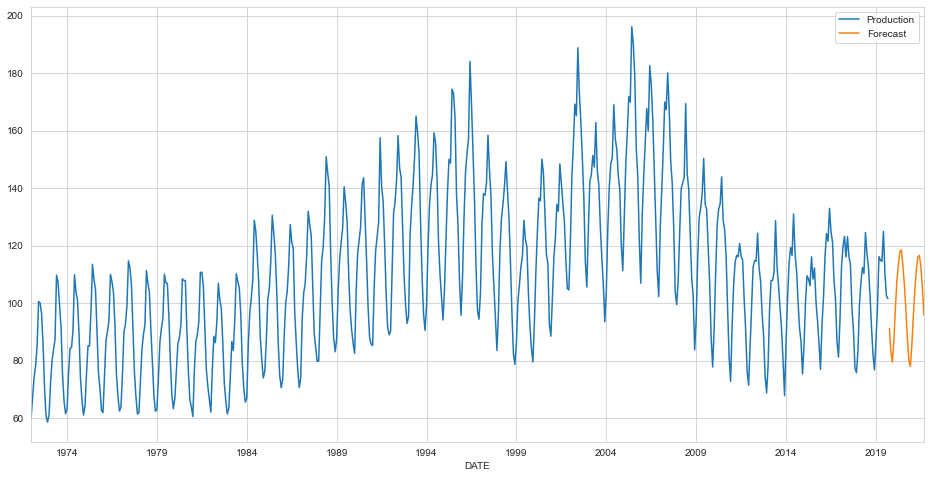

In [87]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

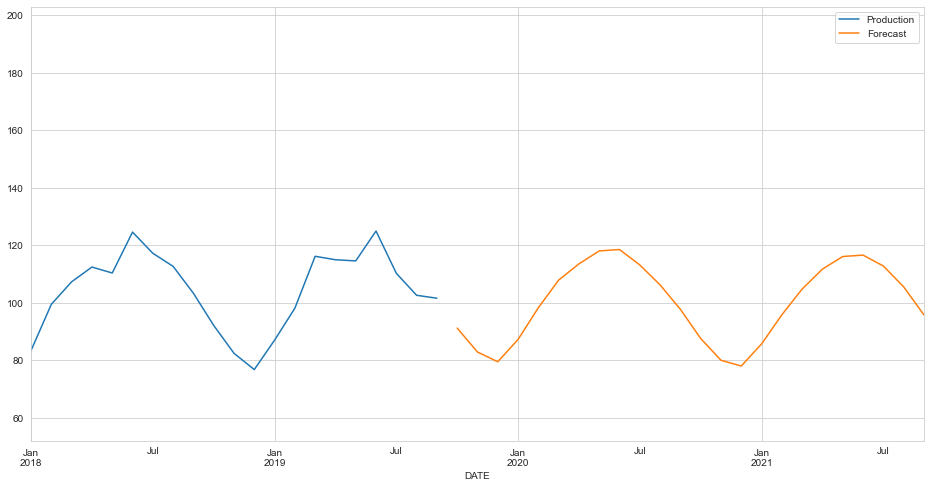

In [88]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___